In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=  3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

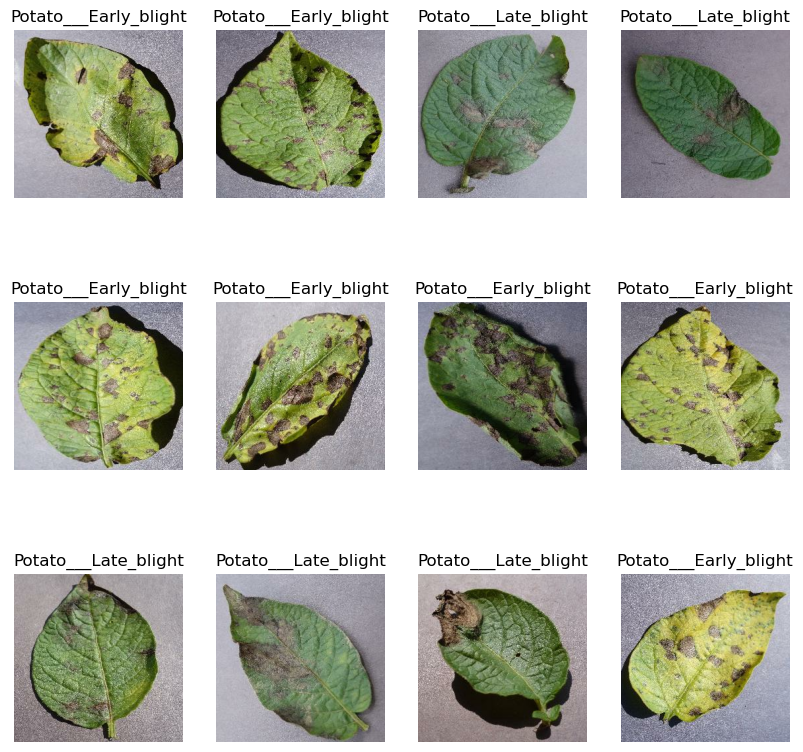

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

### Data Preparation

In [9]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)


54

In [15]:
test_val_ds = dataset.skip(54)
len(test_val_ds)

14

In [17]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [19]:
val_ds = test_val_ds.take(6)
test_ds = test_val_ds.skip(6)


In [21]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuggle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuggle_size, seed = 12)
    # Get size of datasets
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    # Split
    train_ds = ds.take(train_size)
    train_val_ds = ds.skip(train_size)
    
    val_ds = train_val_ds.take(val_size)
    test_ds = train_val_ds.skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds)

54

In [27]:
len(val_ds)

6

In [29]:
len(test_ds)

8

In [31]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


### Data Augmentation

In [34]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/ 255)
])

In [36]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

### Model 

In [55]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    layers.Input(shape=input_shape),  # Add an Input layer here
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),

])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])

In [67]:
history = model.fit(train_ds, epochs = 10, batch_size = BATCH_SIZE, verbose = 1, validation_data =  val_ds)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9603 - loss: 0.1154 - val_accuracy: 0.9375 - val_loss: 0.1350
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9666 - loss: 0.0854 - val_accuracy: 0.9115 - val_loss: 0.2090
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9680 - loss: 0.0855 - val_accuracy: 0.9427 - val_loss: 0.0915
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.9784 - loss: 0.0646 - val_accuracy: 0.8802 - val_loss: 0.3388
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9720 - loss: 0.0771 - val_accuracy: 0.9792 - val_loss: 0.0648
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9733 - loss: 0.0809 - val_accuracy: 0.9531 - val_loss: 0.0866
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9788 - loss: 0.0506 - val_accuracy: 0.9323 - val_loss: 0.1772
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9843 - loss: 0.0375 - val_accuracy: 0.9635 - va

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [71]:
val_loss

[0.13499636948108673,
 0.20899032056331635,
 0.0915045514702797,
 0.3388007879257202,
 0.06478014588356018,
 0.08659347146749496,
 0.17723242938518524,
 0.07546916604042053,
 0.10696741938591003,
 0.29543212056159973]

Text(0.5, 1.0, 'Training and validation accuracy')

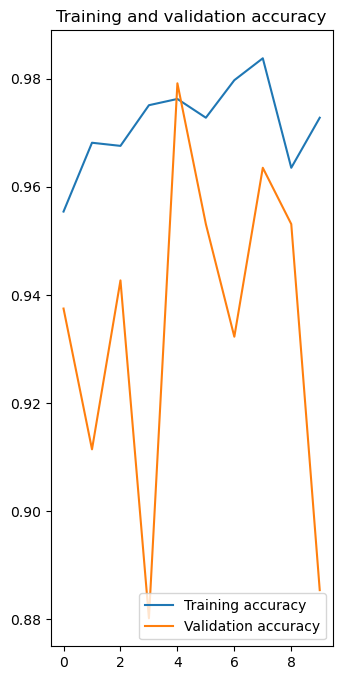

In [75]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(len(acc)),acc, label = 'Training accuracy')
plt.plot(range(len(val_acc)),val_acc, label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')



First image to predict
First image's actual label  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Potato___Early_blight


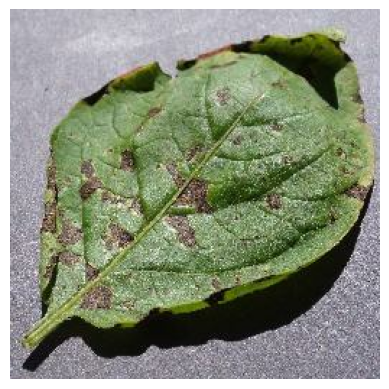

In [91]:
import numpy as np
for images_batch, labels_batch  in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print('First image to predict')
    plt.imshow(first_image)
    plt.axis("off")
    print("First image's actual label ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [107]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


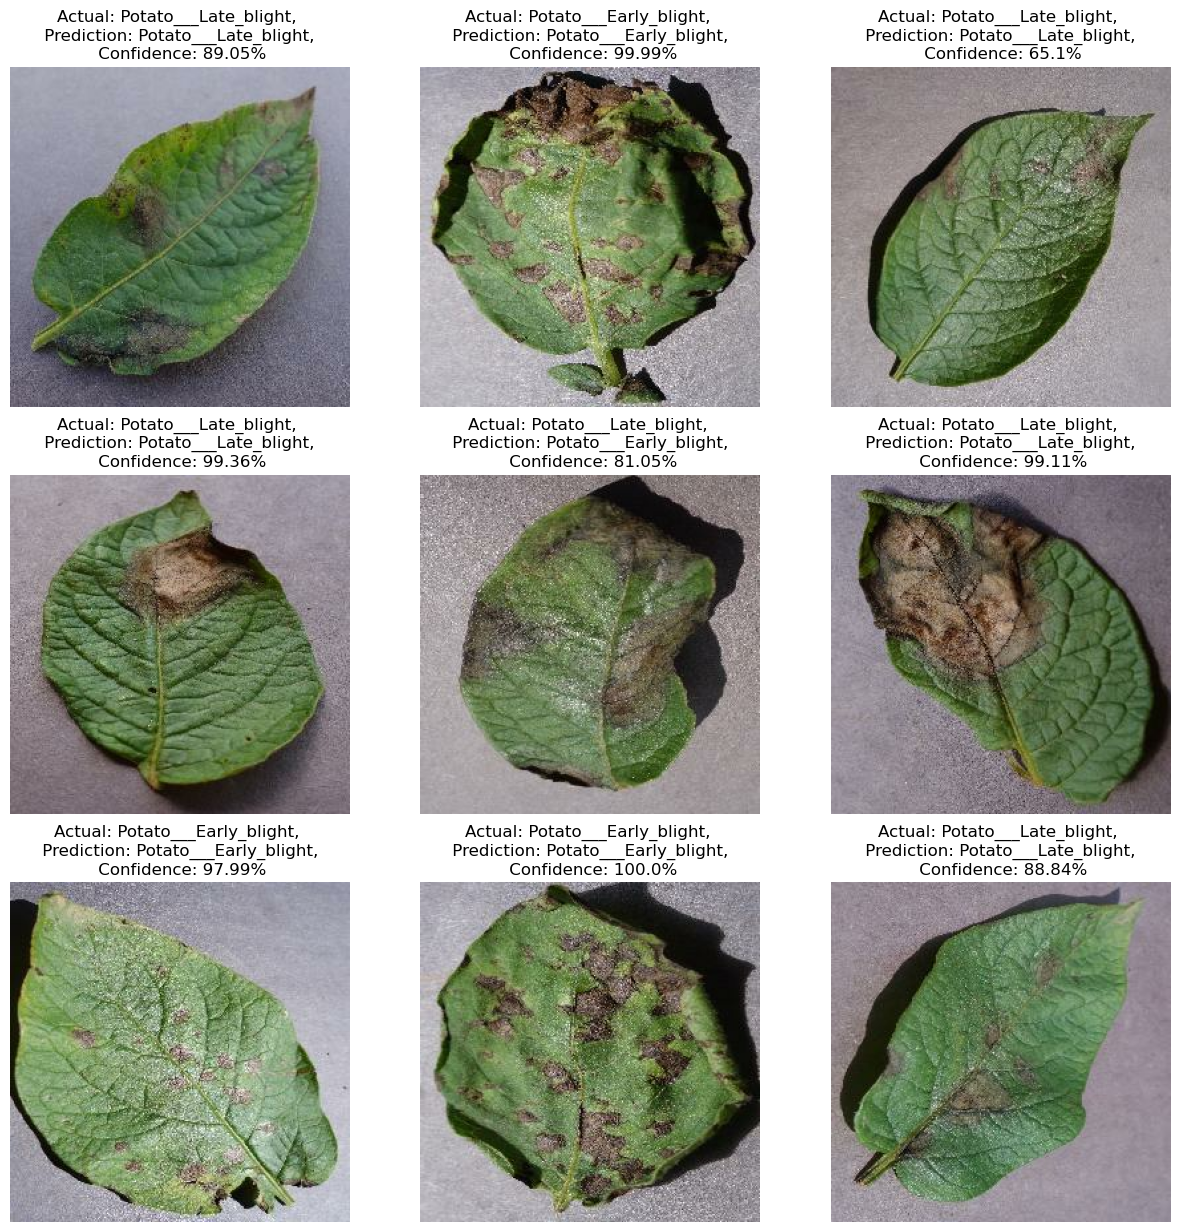

In [109]:
plt.figure(figsize = (15,15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual: {actual_class}, \n Prediction: {predicted_class}, \n Confidence: {confidence}%')
        
        plt.axis('off')
        

In [117]:
import os

os.makedirs('../models/', exist_ok=True)


In [119]:
model_version = 1
model.save(f'../models/model_v{model_version}.keras')  # Save in the Keras format
